# Nome: Raylander Marques Melo
# Matrícula: 586108

## Crie um arquivo Jupyter Notebook e realize as seguintes operações:

In [15]:
!pip install pandas neo4j matplotlib numpy sentence_transformers

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached torch-2.8.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_

In [16]:
import pandas as pd
from neo4j import GraphDatabase
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

/home/raylander/Desktop/Estrutura de dados/Lista 1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### a)  Ler o dataset fakeTelegram.BR_2022.csv, o qual está disponível no link a seguir: https://drive.google.com/file/d/1c_hLzk85pYw-huHSnFYZM_gn-dUsYRDm/view?usp=drive_link

In [2]:
# Abre do aquivo CSV e printa alguns elementos
df = pd.read_csv("/home/raylander/Desktop/Estrutura de dados/Lista 1/fakeTelegram.BR_2022_tratado.csv")
df

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,id_message,message_type,messenger,media_name,media_md5,caracteres,words,viral,sharings,sentiment
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,...,16385,Texto,telegram,NaN,NaN,110,20,0,1.0,0
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",...,16386,Texto,telegram,NaN,NaN,141,23,0,1.0,1
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",...,16366,Texto,telegram,NaN,NaN,350,59,0,1.0,-1
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,...,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,40,7,0,1.0,0
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,...,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637,0,0,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557581,2022-11-11 12:06:15,333e9869f23dbd4682d1be382d9c1e59,e56ec342fc599ebb4ed89655eb6f03aa,25e43b6a58b848c43ad5b5f9e979822a.jpg,url,https://terrabrasilnoticias.com/2022/11/bndes-...,True,True,False,"BNDES tem lucro de R$ 9,6 bilhões no terceiro ...",...,575796,Url,telegram,NaN,25e43b6a58b848c43ad5b5f9e979822a,152,12,1,2.0,1
557582,2022-11-11 12:09:08,NaN,5b10d7739171149be6d9961e3350c071,657949d03e4088f6b332e2686ccd3221.jpg,url,https://youtu.be/8g1Vz9_0xVk,True,True,False,https://youtu.be/8g1Vz9_0xVk,...,1286443,Url,telegram,NaN,657949d03e4088f6b332e2686ccd3221,28,1,1,2.0,0
557583,2022-11-11 12:09:47,NaN,1590a03f43b5ba4b6147a1c5e1dd357b,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro.\n\n...",...,13294,Imagem,telegram,NaN,a21848a61045380a6483866daed0ca0e,68,6,1,4.0,0
557584,2022-11-11 12:09:46,NaN,5b10d7739171149be6d9961e3350c071,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro.\n\n...",...,1286444,Imagem,telegram,NaN,a21848a61045380a6483866daed0ca0e,68,6,1,4.0,0


In [3]:
# Remove linhas com id_member_anonymous NaN
df = df[df['id_member_anonymous'].notna()]

In [4]:
# Definir threshold (ajuste conforme sua escala)
threshold = 0.7 

# Criar coluna booleana
df["is_misinformation"] = df["score_misinformation"] >= threshold

# Ver resultado
print(df[["score_misinformation", "is_misinformation"]].head())

   score_misinformation  is_misinformation
0                   NaN              False
2              0.157242              False
3                   NaN              False
4                   NaN              False
6              0.974258               True


/tmp/ipykernel_8340/2902847713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_misinformation"] = df["score_misinformation"] >= threshold


In [6]:
df.columns

Index(['date_message', 'id_member_anonymous', 'id_group_anonymous', 'media',
       'media_type', 'media_url', 'has_media', 'has_media_url', 'trava_zap',
       'text_content_anonymous', 'dataset_info_id', 'date_system',
       'score_sentiment', 'score_misinformation', 'id_message', 'message_type',
       'messenger', 'media_name', 'media_md5', 'caracteres', 'words', 'viral',
       'sharings', 'sentiment', 'is_misinformation'],
      dtype='object')

In [5]:
q3 = df['sharings'].quantile(0.75)

df['viral'] = (df['sharings'] >= q3).astype(int)

# Converte a coluna 'viral' de 0/1 para False/True
df['viral'] = df['viral'].apply(lambda x: True if x == 1 else False)

# Confirmação rápida
print(df['viral'].value_counts())
df

/tmp/ipykernel_8340/3699340542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['viral'] = (df['sharings'] >= q3).astype(int)
/tmp/ipykernel_8340/3699340542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['viral'] = df['viral'].apply(lambda x: True if x == 1 else False)


viral
False    185507
True      48738
Name: count, dtype: int64


,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,message_type,messenger,media_name,media_md5,caracteres,words,viral,sharings,sentiment,is_misinformation
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,...,Texto,telegram,NaN,NaN,110,20,False,1.0,0,False
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",...,Texto,telegram,NaN,NaN,350,59,False,1.0,-1,False
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,...,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,40,7,False,1.0,0,False
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,...,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637,0,0,False,NaN,0,False
6,2022-10-05 06:29:09,3b685d44ff197b98d7c9e99b8f6b5281,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,*SE ALGUÉM TE PERGUNTAR O QUE FOI QUE BOLSONAR...,...,Texto,telegram,NaN,NaN,3669,618,False,1.0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557577,2022-11-11 12:05:39,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,b9867478b317a003306e1c3f480d103c.jpg,image/jpg,NaN,True,False,False,NaN,...,Imagem,telegram,NaN,b9867478b317a003306e1c3f480d103c,0,0,False,NaN,0,False
557578,2022-11-11 12:05:55,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,8c69214f12719a5ad811ae5970fa721b.jpg,image/jpg,NaN,True,False,False,NaN,...,Imagem,telegram,NaN,8c69214f12719a5ad811ae5970fa721b,0,0,False,NaN,0,False
557579,2022-11-11 12:05:56,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,3811191d6ad4e71cb7e492bf6ef22a8e.jpg,image/jpg,https://t.me/Manager_Marcus_Chat_Up_Now,True,True,False,ENVIE SEU PEDIDO !!!\n\nOI ?\n\nOLÁ ?\n\nQUÃO?...,...,Imagem,telegram,NaN,3811191d6ad4e71cb7e492bf6ef22a8e,287,42,True,63.0,0,False
557580,2022-11-11 12:05:41,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,9dd3b338a07226a04f97df82fbbcb36b.jpg,image/jpg,https://t.me/Manager_Marcus_Chat_Up_Now,True,True,False,NOVOS MEMBROS SEMPRE CLICAM NO LINK DO ADMINIS...,...,Imagem,telegram,NaN,9dd3b338a07226a04f97df82fbbcb36b,254,28,True,12.0,0,False


### b)  Remova os trava-zaps. 

In [6]:
# Soma a quantidade de elementos com True na coluna 'trava_zap' já existente no dataset
print(df['trava_zap'].sum())

12


In [7]:
# Retira as linhas que possuem trava-zap
df = df[df['trava_zap'] == False]
# Printa o dataset resultante
df

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,message_type,messenger,media_name,media_md5,caracteres,words,viral,sharings,sentiment,is_misinformation
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,...,Texto,telegram,NaN,NaN,110,20,False,1.0,0,False
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",...,Texto,telegram,NaN,NaN,350,59,False,1.0,-1,False
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,...,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,40,7,False,1.0,0,False
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,...,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637,0,0,False,NaN,0,False
6,2022-10-05 06:29:09,3b685d44ff197b98d7c9e99b8f6b5281,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,*SE ALGUÉM TE PERGUNTAR O QUE FOI QUE BOLSONAR...,...,Texto,telegram,NaN,NaN,3669,618,False,1.0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557577,2022-11-11 12:05:39,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,b9867478b317a003306e1c3f480d103c.jpg,image/jpg,NaN,True,False,False,NaN,...,Imagem,telegram,NaN,b9867478b317a003306e1c3f480d103c,0,0,False,NaN,0,False
557578,2022-11-11 12:05:55,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,8c69214f12719a5ad811ae5970fa721b.jpg,image/jpg,NaN,True,False,False,NaN,...,Imagem,telegram,NaN,8c69214f12719a5ad811ae5970fa721b,0,0,False,NaN,0,False
557579,2022-11-11 12:05:56,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,3811191d6ad4e71cb7e492bf6ef22a8e.jpg,image/jpg,https://t.me/Manager_Marcus_Chat_Up_Now,True,True,False,ENVIE SEU PEDIDO !!!\n\nOI ?\n\nOLÁ ?\n\nQUÃO?...,...,Imagem,telegram,NaN,3811191d6ad4e71cb7e492bf6ef22a8e,287,42,True,63.0,0,False
557580,2022-11-11 12:05:41,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,9dd3b338a07226a04f97df82fbbcb36b.jpg,image/jpg,https://t.me/Manager_Marcus_Chat_Up_Now,True,True,False,NOVOS MEMBROS SEMPRE CLICAM NO LINK DO ADMINIS...,...,Imagem,telegram,NaN,9dd3b338a07226a04f97df82fbbcb36b,254,28,True,12.0,0,False


### c)  Remover textos com menos de 5 palavras.  

In [8]:
# Função para contar o número de palavras
def count_words(text):
    if isinstance(text, str):  # Verifica se o valor é uma string
        return len(text.split())
    return 0  # Caso não seja string, retorna 0 palavras

# Adiciona a coluna 'word_count' ao DataFrame
df['word_count'] = df['text_content_anonymous'].apply(count_words)

# Filtra os textos com mais de 5 palavras
df = df[df['word_count'] >= 5]
df

/tmp/ipykernel_8340/1893908652.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['text_content_anonymous'].apply(count_words)


,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,messenger,media_name,media_md5,caracteres,words,viral,sharings,sentiment,is_misinformation,word_count
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,...,telegram,NaN,NaN,110,20,False,1.0,0,False,20
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",...,telegram,NaN,NaN,350,59,False,1.0,-1,False,59
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,...,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,40,7,False,1.0,0,False,7
6,2022-10-05 06:29:09,3b685d44ff197b98d7c9e99b8f6b5281,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,*SE ALGUÉM TE PERGUNTAR O QUE FOI QUE BOLSONAR...,...,telegram,NaN,NaN,3669,618,False,1.0,1,True,618
9,2022-10-05 06:29:48,a7e85072244cae15446c9d517dc01a1a,b8a8737812c7fd7d3e0bdbb65ef6306f,NaN,NaN,www.marketingdigitalparavencer.com.br,False,True,False,O Deputado Federal pelo NOVO e que foi candida...,...,telegram,NaN,NaN,1242,153,False,1.0,-1,False,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557574,2022-11-11 12:05:39,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,1e57044095e6cb86bc7373b1a6bdf035.jpg,image/jpg,NaN,True,False,False,SOMOS TRADERS PROFISSIONAIS COM MAIS DE 20 ANO...,...,telegram,NaN,1e57044095e6cb86bc7373b1a6bdf035,140,23,True,13.0,0,False,23
557575,2022-11-11 12:05:38,333e9869f23dbd4682d1be382d9c1e59,e56ec342fc599ebb4ed89655eb6f03aa,c59e2cebce8773795fb965bdbcc4d277.jpg,url,https://terrabrasilnoticias.com/2022/11/deputa...,True,True,False,"Deputado é reeleito nos Estados Unidos, mas mo...",...,telegram,NaN,c59e2cebce8773795fb965bdbcc4d277,162,13,False,3.0,0,False,13
557579,2022-11-11 12:05:56,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,3811191d6ad4e71cb7e492bf6ef22a8e.jpg,image/jpg,https://t.me/Manager_Marcus_Chat_Up_Now,True,True,False,ENVIE SEU PEDIDO !!!\n\nOI ?\n\nOLÁ ?\n\nQUÃO?...,...,telegram,NaN,3811191d6ad4e71cb7e492bf6ef22a8e,287,42,True,63.0,0,False,42
557580,2022-11-11 12:05:41,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,9dd3b338a07226a04f97df82fbbcb36b.jpg,image/jpg,https://t.me/Manager_Marcus_Chat_Up_Now,True,True,False,NOVOS MEMBROS SEMPRE CLICAM NO LINK DO ADMINIS...,...,telegram,NaN,9dd3b338a07226a04f97df82fbbcb36b,254,28,True,12.0,0,False,28


In [10]:
# Remover a mensagem automática do TSE
df = df[df['text_content_anonymous'] != 
    "This community was blocked in Brazil following a decision of the Superior Electoral Court (TSE)."]

df

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,messenger,media_name,media_md5,caracteres,words,viral,sharings,sentiment,is_misinformation,word_count
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,...,telegram,NaN,NaN,110,20,False,1.0,0,False,20
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",...,telegram,NaN,NaN,350,59,False,1.0,-1,False,59
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,...,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,40,7,False,1.0,0,False,7
6,2022-10-05 06:29:09,3b685d44ff197b98d7c9e99b8f6b5281,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,*SE ALGUÉM TE PERGUNTAR O QUE FOI QUE BOLSONAR...,...,telegram,NaN,NaN,3669,618,False,1.0,1,True,618
9,2022-10-05 06:29:48,a7e85072244cae15446c9d517dc01a1a,b8a8737812c7fd7d3e0bdbb65ef6306f,NaN,NaN,www.marketingdigitalparavencer.com.br,False,True,False,O Deputado Federal pelo NOVO e que foi candida...,...,telegram,NaN,NaN,1242,153,False,1.0,-1,False,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557574,2022-11-11 12:05:39,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,1e57044095e6cb86bc7373b1a6bdf035.jpg,image/jpg,NaN,True,False,False,SOMOS TRADERS PROFISSIONAIS COM MAIS DE 20 ANO...,...,telegram,NaN,1e57044095e6cb86bc7373b1a6bdf035,140,23,True,13.0,0,False,23
557575,2022-11-11 12:05:38,333e9869f23dbd4682d1be382d9c1e59,e56ec342fc599ebb4ed89655eb6f03aa,c59e2cebce8773795fb965bdbcc4d277.jpg,url,https://terrabrasilnoticias.com/2022/11/deputa...,True,True,False,"Deputado é reeleito nos Estados Unidos, mas mo...",...,telegram,NaN,c59e2cebce8773795fb965bdbcc4d277,162,13,False,3.0,0,False,13
557579,2022-11-11 12:05:56,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,3811191d6ad4e71cb7e492bf6ef22a8e.jpg,image/jpg,https://t.me/Manager_Marcus_Chat_Up_Now,True,True,False,ENVIE SEU PEDIDO !!!\n\nOI ?\n\nOLÁ ?\n\nQUÃO?...,...,telegram,NaN,3811191d6ad4e71cb7e492bf6ef22a8e,287,42,True,63.0,0,False,42
557580,2022-11-11 12:05:41,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,9dd3b338a07226a04f97df82fbbcb36b.jpg,image/jpg,https://t.me/Manager_Marcus_Chat_Up_Now,True,True,False,NOVOS MEMBROS SEMPRE CLICAM NO LINK DO ADMINIS...,...,telegram,NaN,9dd3b338a07226a04f97df82fbbcb36b,254,28,True,12.0,0,False,28


### d)  Monte  um  grafo  no  Neo4J  para  modelar  (representar)  as  relações  entre  postagens, usuários e grupos do Telegram. 

In [37]:
# === Conexão com Neo4j ===
uri = "neo4j://localhost:7687"
user = "neo4j"
password = "que321rg"
driver = GraphDatabase.driver(uri, auth=(user, password))

In [ ]:
# Criar nós de usuários

def create_users(tx, user_id):
    tx.run('MERGE (u:User {id_user: $user_id})', user_id=user_id)

with driver.session() as session:
    for uid in df['id_member_anonymous'].unique():
        session.execute_write(create_users, uid)

In [ ]:
df['message'] = df['text_content_anonymous'].astype(str).str.strip()

/tmp/ipykernel_8340/1711222836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['text_content_anonymous'].astype(str).str.strip()


In [ ]:
# Extração de Embedings

model = SentenceTransformer('all-MiniLM-L6-v2')  # leve e bom para similaridade
df['embedding'] = df['message'].apply(lambda x: model.encode(x, convert_to_tensor=True))

/tmp/ipykernel_8340/3604793548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embedding'] = df['message'].apply(lambda x: model.encode(x, convert_to_tensor=True))


In [ ]:
# Criar relacionamentos de mensagens iguais
grouped = df.groupby(['id_group_anonymous'])
threshold = 0.75

with driver.session() as session:
    for group_id, group_df in grouped:
        users = group_df['id_member_anonymous'].unique()
        embeddings = group_df["embedding"].tolist()
        n = len(users)

        for i in range(n):
            for j in range(i+1, n):
                sim = util.cos_sim(embeddings[i], embeddings[j]).item()
                if sim >= threshold:
                    u1, u2 = users[i], users[j]
                    session.run("""
                        MATCH (a:User {id_user: $u1}), (b:User {id_user: $u2})
                        MERGE (a)-[r:SIMILAR_MESSAGE]->(b)
                        ON CREATE SET r.weight = 1
                        ON MATCH SET r.weight = r.weight + 1
                    """, u1=u1, u2=u2)

![Texto alternativo](graph_geral.png)


In [ ]:
# Criar relacionamento de mensagens virais
viral_df = df[df['viral'] == True]
# Criar relacionamento de mensagens virais
grouped = viral_df.groupby(['id_group_anonymous', 'text_content_anonymous'])

with driver.session() as session:
    for (group_id, message), group_df in grouped:
        users = group_df['id_member_anonymous'].unique()
        n = len(users)

        for i in range(n):
            for j in range(i+1, n):
                u1, u2 = users[i], users[j]
                session.run(
                    """
                    MATCH (a:User {id_user: $u1}), (b:User {id_user: $u2})
                    MERGE (a)-[r:SHARED_VIRAL_MESSAGE]-(b)
                    ON CREATE SET r.weight = 1
                    ON MATCH SET r.weight = r.weight + 1
                """, u1=u1, u2=u2
                )

![Texto alternativo](graph_viral.png)

In [ ]:
# Filtrar somente mensagens de desinformação
misinfo_df = df[df['is_misinformation'] == True]

grouped = misinfo_df.groupby(['id_group_anonymous', 'text_content_anonymous'])

with driver.session() as session:
    for (group_id, message), group_df in grouped:
        users = group_df['id_member_anonymous'].unique()
        n = len(users)

        for i in range(n):
            for j in range(i+1, n):
                u1, u2 = users[i], users[j]
                session.run(
                    """
                    MATCH (a:User {id_user: $u1}), (b:User {id_user: $u2})
                    MERGE (a)-[r:SHARED_MISINFO_MESSAGE]-(b)
                    ON CREATE SET r.weight = 1
                    ON MATCH SET r.weight = r.weight + 1
                """, u1=u1, u2=u2
                )

![Texto alternativo](graph_desinformação.png)

#### Monte uma tabela contendo a quantidade de nós e a quantidade de arestas para cada grafo (mensagens gerais, mensagens virais e mensagens com desinformação). 

In [ ]:
# Realizando consulta para contar a quantidade de nós e arestas em cada grafo 
query = """
MATCH (u:User)
WITH count(u) AS n
MATCH ()-[r:SIMILAR_MESSAGE]->()
RETURN "Geral" AS grafo, n AS nodes, count(r) AS edges
UNION
MATCH (u:User)
WITH count(u) AS n
MATCH ()-[r:SHARED_VIRAL_MESSAGE]->()
RETURN "Viral" AS grafo, n AS nodes, count(r) AS edges
UNION
MATCH (u:User)
WITH count(u) AS n
MATCH ()-[r:SHARED_MISINFO_MESSAGE]->()
RETURN "Desinformação" AS grafo, n AS nodes, count(r) AS edges
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_stats = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_stats)

           grafo  nodes  edges
0          Geral  10677  51221
1          Viral  10677   3192
2  Desinformação  10677    794


#### Verifique se existem grupos isolados e clusters de usuários fortemente conectados. Isso pode ocorrer caso existam usuários engajados que possuem participação ativa em diversos grupos. 

##### Grafo Geral

In [70]:
with driver.session() as session:
    # Está consulta é feita através do GDS (Graph Data Science) plugin do Neo4j que cria grafos em memória para posteriores análises.
    # Executar consulta
    session.run("""
                // Cria um grafo em memória
                CALL gds.graph.project(
                // Nome do grafo
                'grafoGeral',
                // Tipo de nó
                'User',
                {   
                    // Tipo de relacionamento
                    SIMILAR_MESSAGE: {
                        // Tipo de relacionamento
                    type: 'SIMILAR_MESSAGE',
                        // Usa grafo não direcionado
                    orientation: 'UNDIRECTED'
                    }
                }
                );
                """)
    
print("Grafo geral em memória criado com sucesso!")

Grafo geral em memória criado com sucesso!


In [ ]:
# Algoritmo de componentes conectados WCC(grupos isolados)
# Executa o algoritmo de componentes fracamente conectados (WCC) sobre o grafo em memória grafoGeral.
# O WCC identifica conjuntos de nós que estão conectados entre si, mesmo que haja direções diferentes nas arestas.
# Exemplo: se A → B e B → C, então {A, B, C} ficam no mesmo componente.

query = """
CALL gds.wcc.stream('grafoGeral')
YIELD componentId, nodeId
RETURN gds.util.asNode(nodeId).id_user AS userId, componentId
ORDER BY componentId, userId;
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_grupos_isolados_geral = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_grupos_isolados_geral)

                                 userId  componentId
0      1078cc958f0febe28f4d03207660715f            0
1      92a2d8fd7144074f659d1d29dc3751da            1
2      d60aa38f62b4977426b70944af4aff72            2
3      3b685d44ff197b98d7c9e99b8f6b5281            3
4      00104fa3c7c085f8edc70d37a40ef2a4            4
...                                 ...          ...
10672  436760b022f6a3fa537666e70ba27595        10670
10673  a105cd0f8482aa411f9f96c9113f76d5        10671
10674  5993a3b1c2a55c6642a89d42b30e07d1        10673
10675  8203868ffea41c4e31704b7a728f32e3        10674
10676  eb1da8f741b919931b2cd09f60c7c1dc        10676

[10677 rows x 2 columns]


In [ ]:
# Clusters (exemplo Louvain para comunidades)
# O Louvain é um algoritmo de detecção de comunidades baseado em modularidade.
# Ele agrupa nós em comunidades de forma a maximizar a modularidade → mede o quanto as conexões são densas dentro do grupo e esparsas entre grupos.

query = """
CALL gds.louvain.stream('grafoGeral')
YIELD nodeId, communityId
RETURN gds.util.asNode(nodeId).id_user AS userId, communityId
ORDER BY communityId, userId;
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_clusters_geral = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_clusters_geral)

                                 userId  communityId
0      1078cc958f0febe28f4d03207660715f            0
1      92a2d8fd7144074f659d1d29dc3751da            1
2      d60aa38f62b4977426b70944af4aff72            2
3      3b685d44ff197b98d7c9e99b8f6b5281            3
4      de568bfcb640bc6c2ce555f27ddbdef4            7
...                                 ...          ...
10672  436760b022f6a3fa537666e70ba27595        10670
10673  a105cd0f8482aa411f9f96c9113f76d5        10671
10674  5993a3b1c2a55c6642a89d42b30e07d1        10673
10675  8203868ffea41c4e31704b7a728f32e3        10674
10676  eb1da8f741b919931b2cd09f60c7c1dc        10676

[10677 rows x 2 columns]


##### Grafo Viral

In [ ]:
with driver.session() as session:
    # Está consulta é feita através do GDS (Graph Data Science) plugin do Neo4j que cria grafos em memória para posteriores análises.
    # Executar consulta
    session.run("""
                // Cria um grafo em memória
                CALL gds.graph.project(
                'grafoViral',
                'User',
                {
                    SHARED_VIRAL_MESSAGE: {
                    type: 'SHARED_VIRAL_MESSAGE',
                    orientation: 'UNDIRECTED'
                    }
                }
                );
                """)
    
print("Grafo viral em memória criado com sucesso!")

Grafo viral em memória criado com sucesso!


In [ ]:
# Algoritmo de componentes conectados (grupos isolados)
query = """
CALL gds.wcc.stream('grafoViral')
YIELD componentId, nodeId
RETURN gds.util.asNode(nodeId).id_user AS userId, componentId
ORDER BY componentId, userId;
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_grupos_isolados_viral = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_grupos_isolados_viral)

                                 userId  componentId
0      1078cc958f0febe28f4d03207660715f            0
1      0025b8d2ad029135a314997d36d499c9            1
2      0049ead7ba0fe5920ee42c7ac245e073            1
3      00659af5fd4cb4aaf0c9445d398a3c5f            1
4      0098e627d15af9f086e9ea1d164afabb            1
...                                 ...          ...
10672  4dd2785c1e784608314af259d655139d        10672
10673  5993a3b1c2a55c6642a89d42b30e07d1        10673
10674  8203868ffea41c4e31704b7a728f32e3        10674
10675  8357d09a2af605633d75995c507077be        10675
10676  eb1da8f741b919931b2cd09f60c7c1dc        10676

[10677 rows x 2 columns]


In [ ]:
# Clusters (exemplo Louvain para comunidades)
query = """
CALL gds.louvain.stream('grafoViral')
YIELD nodeId, communityId
RETURN gds.util.asNode(nodeId).id_user AS userId, communityId
ORDER BY communityId, userId;
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_clusters_viral = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_clusters_viral)

                                 userId  communityId
0      1078cc958f0febe28f4d03207660715f            0
1      3b685d44ff197b98d7c9e99b8f6b5281            3
2      a7e85072244cae15446c9d517dc01a1a            4
3      de568bfcb640bc6c2ce555f27ddbdef4            7
4      1f1fda9ff50058a6a0c81574b13353d0           10
...                                 ...          ...
10672  4dd2785c1e784608314af259d655139d        10672
10673  5993a3b1c2a55c6642a89d42b30e07d1        10673
10674  8203868ffea41c4e31704b7a728f32e3        10674
10675  8357d09a2af605633d75995c507077be        10675
10676  eb1da8f741b919931b2cd09f60c7c1dc        10676

[10677 rows x 2 columns]


##### Grafo Desinformação

In [ ]:
with driver.session() as session:
    # Está consulta é feita através do GDS (Graph Data Science) plugin do Neo4j que cria grafos em memória para posteriores análises.
    # Executar consulta
    session.run("""
                // Cria um grafo em memória
                CALL gds.graph.project(
                'grafoDesinformacao',
                'User',
                {
                    SHARED_MISINFO_MESSAGE: {
                    type: 'SHARED_MISINFO_MESSAGE',
                    orientation: 'UNDIRECTED'
                    }
                }
                );
                """)
    
print("Grafo desinformação em memória criado com sucesso!")

Grafo desinformação em memória criado com sucesso!


In [ ]:
# Algoritmo de componentes conectados (grupos isolados)
query = """
CALL gds.wcc.stream('grafoDesinformacao')
YIELD componentId, nodeId
RETURN gds.util.asNode(nodeId).id_user AS userId, componentId
ORDER BY componentId, userId;
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_grupos_isolados_desinformacao = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_grupos_isolados_desinformacao)

                                 userId  componentId
0      1078cc958f0febe28f4d03207660715f            0
1      92a2d8fd7144074f659d1d29dc3751da            1
2      7cb339a318060295bc2beac92ad88faa            2
3      d60aa38f62b4977426b70944af4aff72            2
4      e98573ad83b9ce8d8730d59bb449b079            2
...                                 ...          ...
10672  4dd2785c1e784608314af259d655139d        10672
10673  5993a3b1c2a55c6642a89d42b30e07d1        10673
10674  8203868ffea41c4e31704b7a728f32e3        10674
10675  8357d09a2af605633d75995c507077be        10675
10676  eb1da8f741b919931b2cd09f60c7c1dc        10676

[10677 rows x 2 columns]


In [ ]:
# Clusters (exemplo Louvain para comunidades)
query = """
CALL gds.louvain.stream('grafoDesinformacao')
YIELD nodeId, communityId
RETURN gds.util.asNode(nodeId).id_user AS userId, communityId
ORDER BY communityId, userId;
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_clusters_desinformacao = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_clusters_desinformacao)

                                 userId  communityId
0      1078cc958f0febe28f4d03207660715f            0
1      92a2d8fd7144074f659d1d29dc3751da            1
2      3b685d44ff197b98d7c9e99b8f6b5281            3
3      d49f81df0c75d1d72bee6c5b2d707da0            6
4      de568bfcb640bc6c2ce555f27ddbdef4            7
...                                 ...          ...
10672  4dd2785c1e784608314af259d655139d        10672
10673  5993a3b1c2a55c6642a89d42b30e07d1        10673
10674  8203868ffea41c4e31704b7a728f32e3        10674
10675  8357d09a2af605633d75995c507077be        10675
10676  eb1da8f741b919931b2cd09f60c7c1dc        10676

[10677 rows x 2 columns]


#### **Grau de centralidade geral**: quantidade de arestas de mensagens gerais saindo do nó. Ou seja, para um dado usuário, mensura o número de usuários que receberam ao menos uma mensagem dele. Quanto maior, com mais usuários esse usuário teve contato;

In [71]:
# Grau de centralidade geral
query = """
// Pega todos os usuários (u) que têm uma aresta SIMILAR_MESSAGE conectando a outro usuário (v).
MATCH (u:User)-[r:SIMILAR_MESSAGE]->(v:User)

// Agrupa por usuário de origem (u)
// Conta quantos destinos distintos (v) ele alcança.
// Isso é justamente o grau de saída (out-degree), ou seja, quantos usuários diferentes aquele usuário está conectado por mensagens similares.
// Se você não usasse DISTINCT, contaria múltiplas arestas repetidas.
WITH u, COUNT(DISTINCT v) AS grau_geral

// Retorna o identificador do usuário (id_user) e o valor do grau.
RETURN u.id_user AS user, grau_geral

// Ordena em ordem decrescente → os usuários mais conectados ficam no topo.
ORDER BY grau_geral DESC
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_centralidade_geral = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_centralidade_geral)

                                  user  grau_geral
0     17efb74c84c88d9088d2cecbcdfc3d2d         232
1     9794a13f91433216821ad18624372498         187
2     99e1cee50b812f52b6e10af2ab00b0c2         178
3     762b3696b26db306fbd2022412c47bd1         175
4     d49f81df0c75d1d72bee6c5b2d707da0         170
...                                ...         ...
2918  cf4eac7c1ed5e1e69b1e388eb3e0fccf           1
2919  f6c84ed9879f5f55017ef0a7c579d64e           1
2920  7fec48039647e4eb4d0a465fd95d59f0           1
2921  d8e7d95d58de323dc240baeb9bf24256           1
2922  fed2aaf2b914964f14ee0ce14787ccc2           1

[2923 rows x 2 columns]


#### **Força geral**: somatório dos pesos de todas as arestas de mensagens gerais saindo do nó. É correlacionado  com  o  grau  de  centralidade  geral,  porém  a  quantidade  de  mensagens enviadas também é levada em conta para calcular essa métrica. Um valor alto indica que o usuário enviou muitas mensagens que atingiram muitos usuários; 

In [ ]:
# Força Geral
query = """
// Pega todos os usuários (u) conectados a outros (v) por arestas SIMILAR_MESSAGE.
// Cada relação r tem um atributo weight (peso da similaridade ou intensidade da relação).
MATCH (u:User)-[r:SIMILAR_MESSAGE]->(v:User)

// Agrupa por usuário de origem (u).
// Soma o peso total das conexões que ele possui.
// Isso gera a força total de similaridade que cada usuário mantém com os outros.
WITH u, SUM(r.weight) AS forca_geral

// Retorna o identificador do usuário (id_user) e o valor agregado da força.
RETURN u.id_user AS user, forca_geral

// Ordena para mostrar primeiro os usuários mais "fortemente conectados".
ORDER BY forca_geral DESC
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_forca_geral = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_forca_geral)

                                  user  forca_geral
0     17efb74c84c88d9088d2cecbcdfc3d2d          233
1     9794a13f91433216821ad18624372498          188
2     99e1cee50b812f52b6e10af2ab00b0c2          178
3     762b3696b26db306fbd2022412c47bd1          175
4     d49f81df0c75d1d72bee6c5b2d707da0          170
...                                ...          ...
2918  cf4eac7c1ed5e1e69b1e388eb3e0fccf            1
2919  f6c84ed9879f5f55017ef0a7c579d64e            1
2920  7fec48039647e4eb4d0a465fd95d59f0            1
2921  d8e7d95d58de323dc240baeb9bf24256            1
2922  fed2aaf2b914964f14ee0ce14787ccc2            1

[2923 rows x 2 columns]


#### **Grau de centralidade viral**: análogo ao grau de centralidade geral, mas relativo somente às  mensagens  virais,  sendo  a  quantidade  de  arestas  de  mensagens  virais  saindo  do  nó. Quanto maior, mais usuários receberam mensagens virais desse usuário; 

In [ ]:
# Grau de centralidade viral
query = """
MATCH (u:User)-[r:SHARED_VIRAL_MESSAGE]->(v:User)
WITH u, COUNT(DISTINCT v) AS grau_viral
RETURN u.id_user AS user, grau_viral
ORDER BY grau_viral DESC
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_centralidade_viral = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_centralidade_viral)

                                 user  grau_viral
0    1ac091b8ed5c4e42383f1b4ff4cc9b2d         124
1    beb77036ff26e78865da19310ac95169          53
2    55042681398deb24b5294a9f5cba240c          36
3    f233cf8b1d4ede06f32199a7e0081bf5          30
4    e426db1ac3cb3399ff190d39ea7d5d3e          28
..                                ...         ...
842  87e18077ebd57808aeb0797dbab5b28e           1
843  4d98c4c720078d61de25bb27e4a23bce           1
844  dad13d38591cd6f0a0c61def1476f074           1
845  c980a0c07349482400fa01580efdba6a           1
846  3c15d63bf0e4b4574bb65d733f5a6258           1

[847 rows x 2 columns]


#### **Força  viral**:  análogo  à  força  geral,  é  somatório  dos  pesos  de  todas  as  arestas  de mensagens  virais  saindo  do  nó.  Um  valor  alto  indica  que  o  usuário  enviou  muitas mensagens virais que atingiram muitos usuários;

In [ ]:
# Força Viral
query = """
MATCH (u:User)-[r:SHARED_VIRAL_MESSAGE]->(v:User)
WITH u, SUM(r.weight) AS forca_viral
RETURN u.id_user AS user, forca_viral
ORDER BY forca_viral DESC
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_forca_viral = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_forca_viral)

                                 user  forca_viral
0    1ac091b8ed5c4e42383f1b4ff4cc9b2d          450
1    9794a13f91433216821ad18624372498          142
2    beb77036ff26e78865da19310ac95169           89
3    4d1389bd32de5dfc0a3fab14573131ac           59
4    e7998863ac2a40086657fab4a6b463c9           53
..                                ...          ...
842  87e18077ebd57808aeb0797dbab5b28e            1
843  4d98c4c720078d61de25bb27e4a23bce            1
844  dad13d38591cd6f0a0c61def1476f074            1
845  c980a0c07349482400fa01580efdba6a            1
846  3c15d63bf0e4b4574bb65d733f5a6258            1

[847 rows x 2 columns]


#### **Grau de centralidade de desinformação**: análogo ao grau de centralidade geral, mas relativo  somente  às  mensagens  de  desinformação,  sendo  a  quantidade  de  arestas  de desinformação saindo do nó. Ou seja, a quantidade de usuários com  quem  esse usuário compartilhou desinformação. Quanto maior, mais usuários receberam desinformação desse usuário; 

In [ ]:
# Grau de centralidade desinformação
query = """
MATCH (u:User)-[r:SHARED_MISINFO_MESSAGE]->(v:User)
WITH u, COUNT(DISTINCT v) AS grau_misinfo
RETURN u.id_user AS user, grau_misinfo
ORDER BY grau_misinfo DESC
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_centralidade_desinformacao = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_centralidade_desinformacao)

                                 user  grau_misinfo
0    1ac091b8ed5c4e42383f1b4ff4cc9b2d            39
1    beb77036ff26e78865da19310ac95169            21
2    f233cf8b1d4ede06f32199a7e0081bf5            16
3    cf061f911f3df59fca0b3f084abe88cc            13
4    c052c859b42c5a1923c22f5a201de746            12
..                                ...           ...
326  99e1cee50b812f52b6e10af2ab00b0c2             1
327  53c82e51a0ae636499d34ad47540fe00             1
328  b6e32c0a548f89909241d2cedaa24dae             1
329  ea06f5d2737fa83e3ed114a37e1bcb59             1
330  7d004a92be94979b8a75e8df09af69b7             1

[331 rows x 2 columns]


#### **Força de desinformação**: análogo à força geral, é o somatório dos pesos de todas as arestas de desinformação saindo do nó. Um valor alto indica que o usuário enviou muita desinformação e que atingiu muitos usuários;

In [ ]:
# Força Desinformação
query = """
MATCH (u:User)-[r:SHARED_MISINFO_MESSAGE]->(v:User)
WITH u, SUM(r.weight) AS forca_misinfo
RETURN u.id_user AS user, forca_misinfo
ORDER BY forca_misinfo DESC
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_forca_desinformacao = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_forca_desinformacao)

                                 user  forca_misinfo
0    1ac091b8ed5c4e42383f1b4ff4cc9b2d             73
1    beb77036ff26e78865da19310ac95169             22
2    a49d88be9798210cb06f9171b4d7317c             18
3    92a98298316caf5bdbd65acfc20908a7             17
4    f233cf8b1d4ede06f32199a7e0081bf5             16
..                                ...            ...
326  cb9cea11fe736b52e16b95692ad89fb0              1
327  99e1cee50b812f52b6e10af2ab00b0c2              1
328  53c82e51a0ae636499d34ad47540fe00              1
329  ea06f5d2737fa83e3ed114a37e1bcb59              1
330  7d004a92be94979b8a75e8df09af69b7              1

[331 rows x 2 columns]


##### **Verifique se os atributos de rede seguem uma distribuição de cauda longa**, possuindo valores baixos nesses atributos e alguns raros usuários com valores muito altos, indicando um comportamento anormal desses usuários que merece investigação. 

In [ ]:
# Função para plotar distribuições de cauda longa
def plot_long_tail(df, col, bins=50):
    data = df[col].dropna()
    
    plt.figure(figsize=(6,4))
    plt.hist(data, bins=bins, log=True)  # log no eixo Y
    plt.xlabel(col)
    plt.ylabel("Frequência (log)")
    plt.title(f"Distribuição de {col}")
    plt.show()


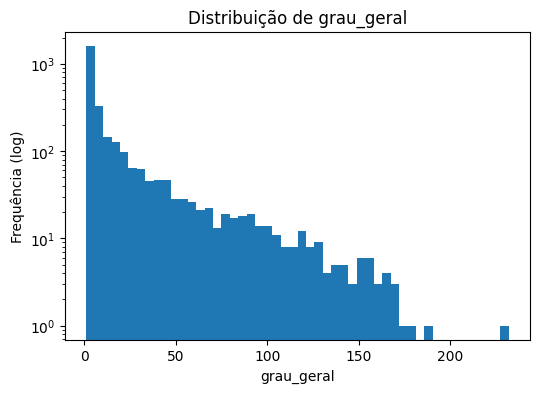

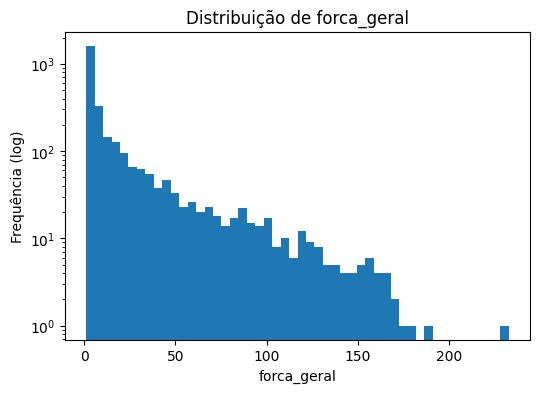

In [ ]:
# Plotar distribuições de cauda longa grau geral e força geral
plot_long_tail(df_centralidade_geral, "grau_geral")
plot_long_tail(df_forca_geral, "forca_geral")

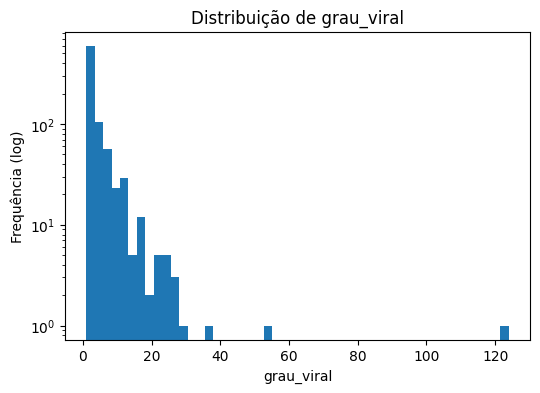

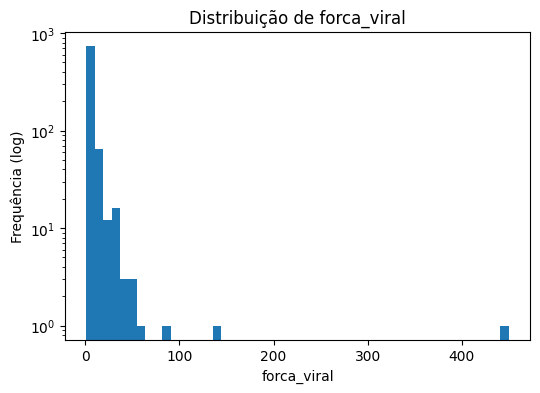

In [ ]:
# Plotar distribuições de cauda longa grau viral e força viral
plot_long_tail(df_centralidade_viral, "grau_viral")
plot_long_tail(df_forca_viral, "forca_viral")

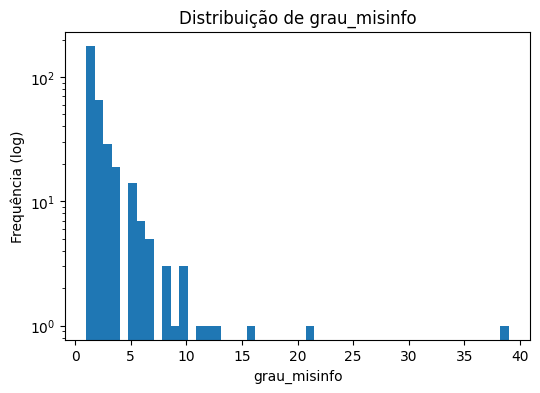

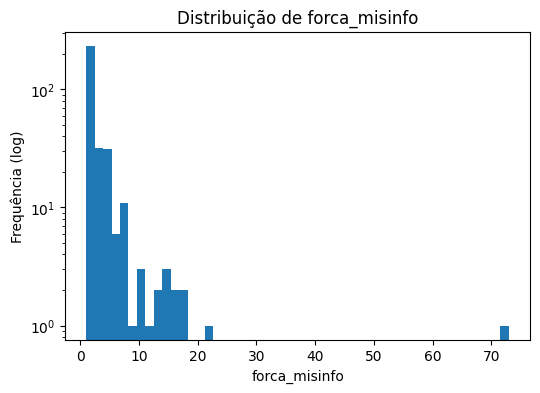

In [ ]:
# Plotar distribuições de cauda longa grau desinformação e força desinformação
plot_long_tail(df_centralidade_desinformacao, "grau_misinfo")
plot_long_tail(df_forca_desinformacao, "forca_misinfo")

##### **Identifique os 5 usuários mais ativos.**

In [ ]:
# 5 usuários mais ativos (maior força geral) usuários que mais enviaram mensagens no grafo geral.
query = """
// Busca todos os nós User que possuem relações SIMILAR_MESSAGE para outros usuários.
MATCH (u:User)-[r:SIMILAR_MESSAGE]->(:User)

// Agrupa por cada usuário u. Soma todos os pesos das arestas de saída de u.
// Isso dá a força total de similaridade que esse usuário compartilha com outros.
WITH u, SUM(r.weight) AS forca_geral

// Retorna o identificador do usuário (id_user) e o valor agregado da força.
RETURN u.id_user AS user, forca_geral

// Ordena para mostrar primeiro os 5 usuários "fortemente conectados".
ORDER BY forca_geral DESC
LIMIT 5
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_forca_geral = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_forca_geral)

                               user  forca_geral
0  17efb74c84c88d9088d2cecbcdfc3d2d          233
1  9794a13f91433216821ad18624372498          188
2  99e1cee50b812f52b6e10af2ab00b0c2          178
3  762b3696b26db306fbd2022412c47bd1          175
4  d49f81df0c75d1d72bee6c5b2d707da0          170


##### **Identifique os 5 usuários que mais espalham desinformação.**

In [ ]:
# 5 usuários que mais espalham desinformação.
query = """
// Busca todos os relacionamentos SHARED_MISINFO_MESSAGE entre usuários.
MATCH (u:User)-[r:SHARED_MISINFO_MESSAGE]->(v:User)

// Agrupa por usuário de origem u. Soma o peso total de todos os relacionamentos de desinformação que ele tem.
WITH u, SUM(r.weight) AS forca_misinfo

// Retorna o identificador do usuário (id_user) e o valor agregado da força de desinformação.
RETURN u.id_user AS user, forca_misinfo

// Ordena para mostrar primeiro os 5 usuários que mais espalham desinformação.
ORDER BY forca_misinfo DESC
LIMIT 5
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_forca_desinformacao = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_forca_desinformacao)

                               user  forca_misinfo
0  1ac091b8ed5c4e42383f1b4ff4cc9b2d             73
1  beb77036ff26e78865da19310ac95169             22
2  a49d88be9798210cb06f9171b4d7317c             18
3  92a98298316caf5bdbd65acfc20908a7             17
4  f233cf8b1d4ede06f32199a7e0081bf5             16


##### **Identifique os 5 usuários mais influentes.**

In [ ]:
# 5 usuários mais influentes.
query = """
// Executa o algoritmo PageRank no grafo chamado grafoGeral.
// stream retorna os resultados de forma contínua (cada nó com seu score), sem armazenar permanentemente no banco.
CALL gds.pageRank.stream('grafoGeral')

// Para cada nó, o algoritmo retorna:
// nodeId: identificador interno do nó no Neo4j.
// score: pontuação de PageRank, que indica a importância central do nó no grafo.
YIELD nodeId, score

// Converte o nodeId de volta para o nó real do grafo.
// Retorna o id_user e o score do PageRank.
RETURN gds.util.asNode(nodeId).id_user AS user, score

// Ordena para mostrar primeiro os 5 usuários mais influentes.
ORDER BY score DESC
LIMIT 5;
"""

# Score é a medida de influência (quanto maior, mais conexões importantes o usuário tem).
# Esse método considera tanto a quantidade quanto a qualidade das conexões.

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_influencia = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_influencia)

                               user     score
0  1665e22b0f564cd46d343f7677014821  4.772569
1  a7840e7844020149e197272748965862  4.017628
2  29dda76df3384c28a07e8bad1ee9ceed  3.373160
3  91810e646ca7c95124f3dd7e3961d87a  3.161869
4  a49d88be9798210cb06f9171b4d7317c  3.153723


##### **Identifique os 5 usuários mais conectados.**

In [ ]:
# 5 usuários mais conectados sem ser ponderado, considerando só as interações sem a quantidade de mensagens.
query = """
// Chama o algoritmo de grau de nós no grafo grafoGeral.
// stream retorna cada nó e seu score sem gravar resultados permanentemente.
CALL gds.degree.stream('grafoGeral')

// nodeId: identificador interno do nó no Neo4j.
// score: número de conexões (relacionamentos) que o nó possui, ou seja, o grau do nó.
YIELD nodeId, score

// Converte o nodeId para o nó real.
// Retorna o id_user e o grau do nó.
RETURN gds.util.asNode(nodeId).id_user AS user, score AS grau

// Ordena em ordem decrescente para mostrar os 5 usuários mais conectados sem ser ponderado.
ORDER BY grau DESC
LIMIT 5;
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_conectados = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_conectados)

                               user   grau
0  a49d88be9798210cb06f9171b4d7317c  312.0
1  99e1cee50b812f52b6e10af2ab00b0c2  297.0
2  17efb74c84c88d9088d2cecbcdfc3d2d  259.0
3  7ee232a84724060180100671c73ac4e9  258.0
4  45e83c32fc1308232f2fa12c76226d1f  219.0


In [67]:
with driver.session() as session:
    session.run("""              
        CALL gds.graph.project(
            'grafoGeralPonderado',
            'User',
            {
                SIMILAR_MESSAGE: {
                    type: 'SIMILAR_MESSAGE',
                    orientation: 'UNDIRECTED',
                    properties: 'weight' 
                }
            }
        )
    """)


In [ ]:
# 5 usuários mais conectados ponderado, considerando as interações com a quantidade de mensagens.
query = """
// Calcula o grau ponderado de cada nó no grafo grafoGeralPonderado.
CALL gds.degree.stream('grafoGeralPonderado', { relationshipWeightProperty: 'weight' })

// nodeId: o ID interno do nó.
// score: soma dos pesos das conexões do nó, ou seja, grau ponderado.
YIELD nodeId, score

// Converte o nodeId para o nó real e retorna o id_user e o grau ponderado.
RETURN gds.util.asNode(nodeId).id_user AS user, score AS grau_ponderado

// Ordena para mostrar os 5 usuários mais conectados ponderados.
ORDER BY grau_ponderado DESC
LIMIT 5;
"""

with driver.session() as session:
    # Executar consulta
    result = session.run(query)
    # Converter resultado para DataFrame
    df_conectados_ponderados = pd.DataFrame([r.data() for r in result])

# Exibir DataFrame
print(df_conectados_ponderados)

                               user  grau_ponderado
0  a49d88be9798210cb06f9171b4d7317c           312.0
1  99e1cee50b812f52b6e10af2ab00b0c2           297.0
2  17efb74c84c88d9088d2cecbcdfc3d2d           260.0
3  7ee232a84724060180100671c73ac4e9           259.0
4  45e83c32fc1308232f2fa12c76226d1f           219.0
